In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
market = pd.read_csv("market_fact.csv")
customer = pd.read_csv("cust_dimen.csv")
order = pd.read_csv("orders_dimen.csv")
product = pd.read_csv("prod_dimen.csv")
shipping = pd.read_csv("shipping_dimen.csv")

In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
Product_Category        17 non-null object
Product_Sub_Category    17 non-null object
Prod_id                 17 non-null object
dtypes: object(3)
memory usage: 488.0+ bytes


In [7]:
sales_df = pd.merge(customer, market, how="inner", left_on="Cust_id", right_on="Cust_id")
sales_df = sales_df.merge(order, how="inner", left_on="Ord_id", right_on="Ord_id")
sales_df = sales_df.merge(product, how="inner", left_on="Prod_id", right_on="Prod_id")
sales_df = sales_df.merge(shipping, how="inner", left_on="Ship_id", right_on="Ship_id")

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 22 columns):
Customer_Name           8399 non-null object
Province                8399 non-null object
Region                  8399 non-null object
Customer_Segment        8399 non-null object
Cust_id                 8399 non-null object
Ord_id                  8399 non-null object
Prod_id                 8399 non-null object
Ship_id                 8399 non-null object
Sales                   8399 non-null float64
Discount                8399 non-null float64
Order_Quantity          8399 non-null int64
Profit                  8399 non-null float64
Shipping_Cost           8399 non-null float64
Product_Base_Margin     8336 non-null float64
Order_ID_x              8399 non-null int64
Order_Date              8399 non-null object
Order_Priority          8399 non-null object
Product_Category        8399 non-null object
Product_Sub_Category    8399 non-null object
Order_ID_y              8399 non-nu

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

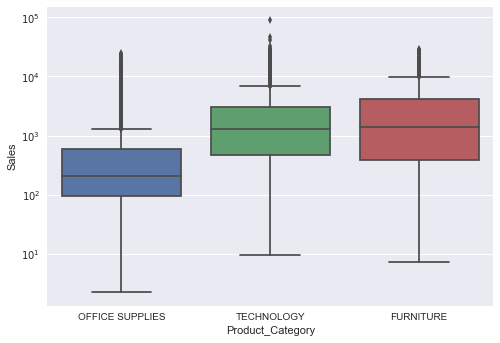

In [14]:
sns.boxplot(x="Product_Category", y="Sales", data=sales_df)
plt.yscale("log")
plt.show()

In [20]:
sns.barplot(x="Product_Category", y="Sales", data=sales_df)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


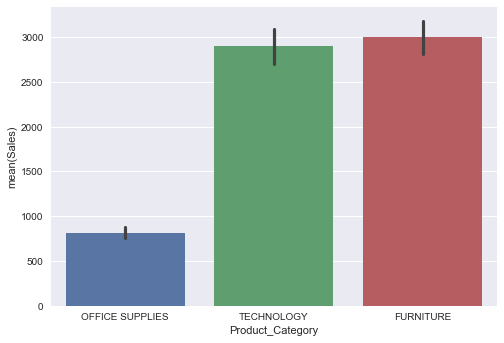

In [21]:
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


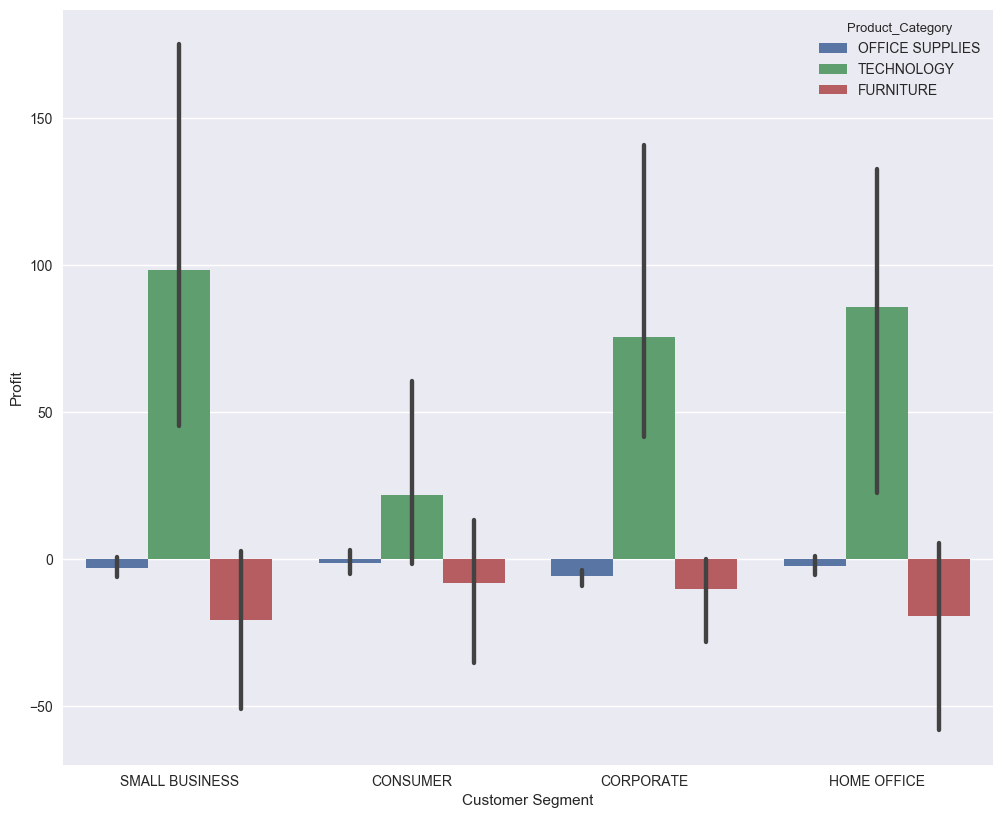

In [28]:
plt.figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x="Customer_Segment", y="Profit", hue="Product_Category", data=sales_df, estimator=np.median)
plt.xlabel("Customer Segment")
plt.ylabel('Profit')
plt.show()

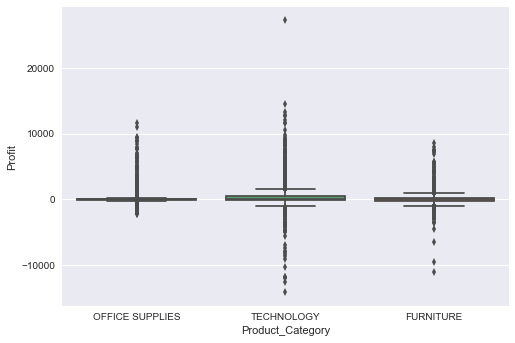

In [11]:
sns.boxplot(x="Product_Category", y="Profit", data=sales_df)
plt.show()

In [12]:
sales_df.Profit.describe()

count     8399.000000
mean       181.184424
std       1196.653371
min     -14140.700000
25%        -83.315000
50%         -1.500000
75%        162.750000
max      27220.690000
Name: Profit, dtype: float64

In [36]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="Customer_Segment", y="Profit", hue="Product_Category", data=sales_df[(sales_df.Profit <= 1000) & (sales_df.Profit > -1000)])
plt.show()

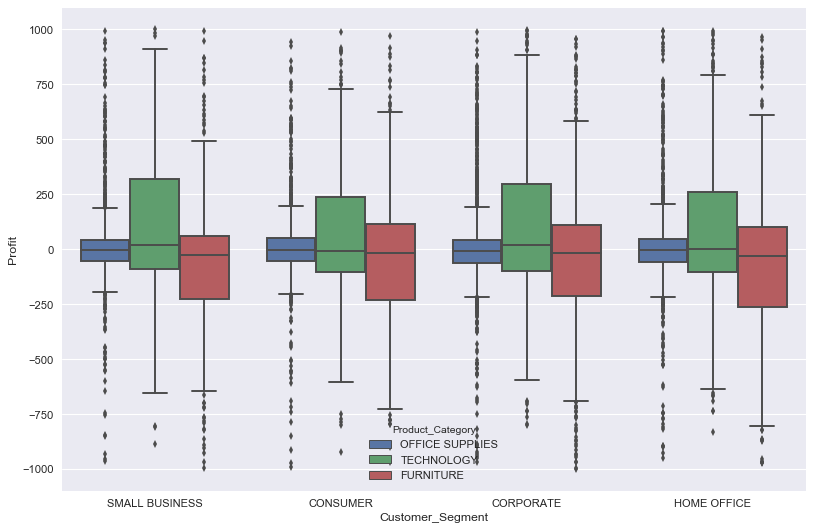

In [35]:
sales_df[(sales_df.Profit <= 1000) & (sales_df.Profit > -1000)]

,Customer_Name,Province,Region,Customer_Segment,Cust_id,Ord_id,Prod_id,Ship_id,Sales,Discount,...,Shipping_Cost,Product_Base_Margin,Order_ID_x,Order_Date,Order_Priority,Product_Category,Product_Sub_Category,Order_ID_y,Ship_Mode,Ship_Date
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1,Ord_1,Prod_1,SHP_1,261.5400,0.04,...,35.00,0.80,3,13-10-2010,LOW,OFFICE SUPPLIES,STORAGE & ORGANIZATION,3,REGULAR AIR,20-10-2010
1,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4,Ord_20,Prod_1,SHP_27,370.4800,0.04,...,4.51,0.59,1792,08-11-2010,LOW,OFFICE SUPPLIES,STORAGE & ORGANIZATION,1792,REGULAR AIR,13-11-2010
2,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5,Ord_5,Prod_1,SHP_7,905.0800,0.09,...,6.22,NaN,613,17-06-2011,HIGH,OFFICE SUPPLIES,STORAGE & ORGANIZATION,613,REGULAR AIR,18-06-2011
3,MONICA FEDERLE,NUNAVUT,NUNAVUT,CORPORATE,Cust_6,Ord_6,Prod_1,SHP_8,2781.8200,0.07,...,35.00,NaN,643,24-03-2011,HIGH,OFFICE SUPPLIES,STORAGE & ORGANIZATION,643,EXPRESS AIR,25-03-2011
4,NICOLE HANSEN,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_24,Ord_55,Prod_1,SHP_72,3338.9800,0.00,...,35.00,0.81,8833,04-05-2012,LOW,OFFICE SUPPLIES,STORAGE & ORGANIZATION,8833,REGULAR AIR,08-05-2012
5,ANDREW GJERTSEN,NUNAVUT,NUNAVUT,CONSUMER,Cust_37,Ord_47,Prod_1,SHP_61,436.1700,0.08,...,7.46,0.59,6916,04-06-2010,LOW,OFFICE SUPPLIES,STORAGE & ORGANIZATION,6916,EXPRESS AIR,08-06-2010
6,BRYAN DAVIS,NORTHWEST TERRITORIES,NORTHWEST TERRITORIES,CORPORATE,Cust_43,Ord_58,Prod_1,SHP_77,2039.5600,0.04,...,35.00,0.80,9127,10-10-2011,NOT SPECIFIED,OFFICE SUPPLIES,STORAGE & ORGANIZATION,9127,EXPRESS AIR,12-10-2011
7,ALAN BARNES,NORTHWEST TERRITORIES,NORTHWEST TERRITORIES,CORPORATE,Cust_45,Ord_209,Prod_1,SHP_286,127.8000,0.07,...,7.51,0.57,33444,06-10-2012,MEDIUM,OFFICE SUPPLIES,STORAGE & ORGANIZATION,33444,REGULAR AIR,08-10-2012
8,JAMIE KUNITZ,NORTHWEST TERRITORIES,NORTHWEST TERRITORIES,CORPORATE,Cust_50,Ord_75,Prod_1,SHP_99,73.0700,0.08,...,11.25,0.60,11941,24-06-2010,CRITICAL,OFFICE SUPPLIES,STORAGE & ORGANIZATION,11941,REGULAR AIR,25-06-2010
9,ALLEN ROSENBLATT,NORTHWEST TERRITORIES,NORTHWEST TERRITORIES,SMALL BUSINESS,Cust_53,Ord_69,Prod_1,SHP_93,5188.8600,0.10,...,8.64,0.78,11137,29-11-2012,HIGH,OFFICE SUPPLIES,STORAGE & ORGANIZATION,11137,REGULAR AIR,30-11-2012


In [38]:
sns.boxplot(x="Product_Category", y="Profit", hue="Customer_Segment", data=sales_df[(sales_df.Profit <= 1000) & (sales_df.Profit > -1000)])

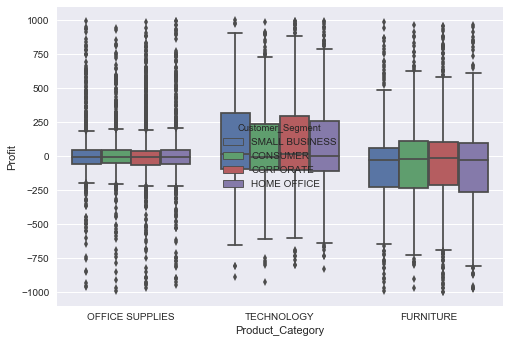

In [39]:
plt.show()

In [52]:
sns.barplot(x="Region", y="Sales", data=sales_df)
plt.xticks(rotation="vertical")

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

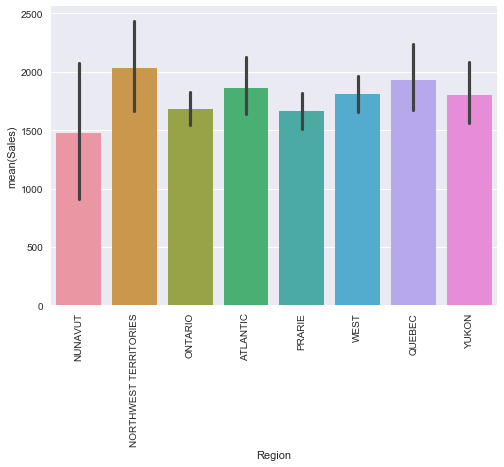

In [53]:
plt.show()

In [54]:
sns.violinplot(x="Region", y="Sales", data=sales_df)

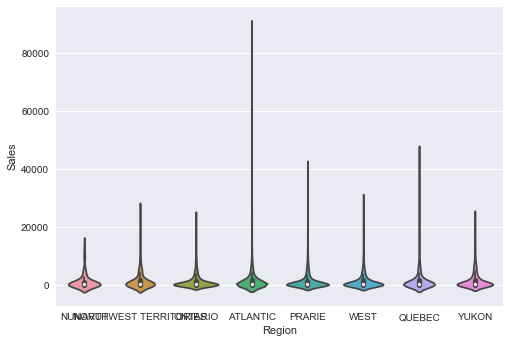

In [55]:
plt.show()

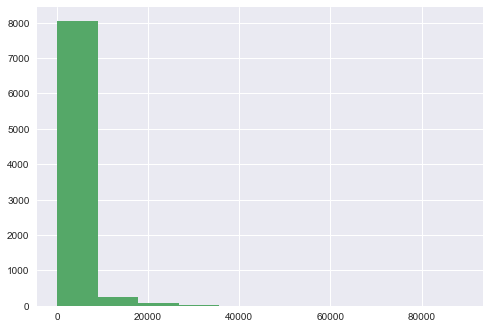

In [58]:
plt.hist(sales_df.Sales)
plt.show()

<hr>
<strong>ANALYZING TIME STAMP DATA</strong>

In [30]:
sales_df['Order_Date'] = pd.to_datetime(sales_df["Order_Date"])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 0 to 8398
Data columns (total 22 columns):
Customer_Name           8399 non-null object
Province                8399 non-null object
Region                  8399 non-null object
Customer_Segment        8399 non-null object
Cust_id                 8399 non-null object
Ord_id                  8399 non-null object
Prod_id                 8399 non-null object
Ship_id                 8399 non-null object
Sales                   8399 non-null float64
Discount                8399 non-null float64
Order_Quantity          8399 non-null int64
Profit                  8399 non-null float64
Shipping_Cost           8399 non-null float64
Product_Base_Margin     8336 non-null float64
Order_ID_x              8399 non-null int64
Order_Date              8399 non-null datetime64[ns]
Order_Priority          8399 non-null object
Product_Category        8399 non-null object
Product_Sub_Category    8399 non-null object
Order_ID_y              839

In [31]:
time_df = sales_df.groupby('Order_Date')['Sales'].sum()

In [40]:
time_df.describe

<bound method NDFrame.describe of Order_Date
2009-01-01     1052.8400
2009-01-02     5031.9000
2009-01-03     7288.1375
2009-01-04     6188.4245
2009-01-05     2583.3300
2009-01-06     9692.6010
2009-01-07    39106.9020
2009-01-08    14562.1800
2009-01-09    20550.6445
2009-01-10    10793.7455
2009-01-11      152.3100
2009-01-12     7282.5000
2009-01-13     1443.3200
2009-01-14    31652.0500
2009-01-15     1238.1100
2009-01-16     5949.0005
2009-01-17    12582.6295
2009-01-18    14521.1400
2009-01-19     5991.2200
2009-01-20     6137.3800
2009-01-21    24975.1500
2009-01-22    50492.2040
2009-01-23     2832.2600
2009-01-24    12056.7200
2009-01-25     1543.5620
2009-01-26    18810.7980
2009-01-27     8518.1915
2009-01-28     1777.4800
2009-01-29    18312.8775
2009-01-30    17713.8700
                 ...    
2012-12-01     8098.5800
2012-12-02     4705.2340
2012-12-03    17665.8735
2012-12-04    14128.1700
2012-12-05    13795.1540
2012-12-06     6681.5600
2012-12-07     2039.5300
2012-

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


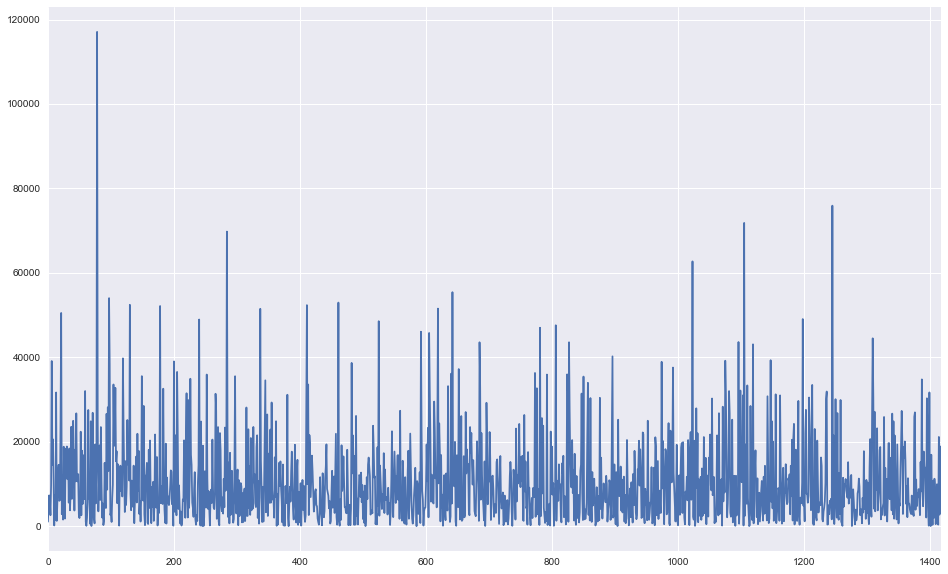

In [33]:
plt.figure(figsize=(16,10))
sns.tsplot(data=time_df)
plt.show()

In [41]:
sales_df['month'] = sales_df.Order_Date.dt.month
sales_df['year'] = sales_df.Order_Date.dt.year

In [42]:
dt_df = sales_df.groupby(["year", "month"]).Sales.mean()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


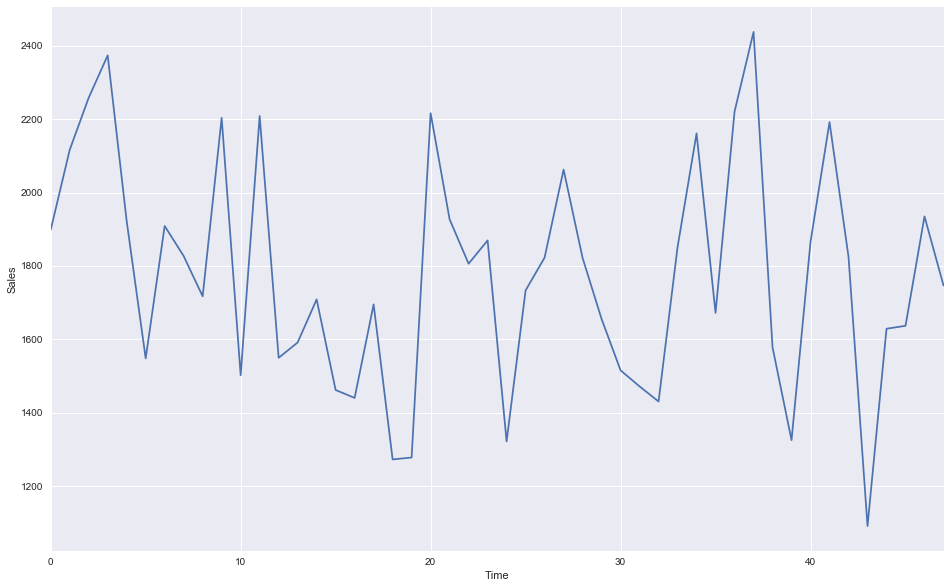

In [45]:
plt.figure(figsize=(16,10))
sns.tsplot(dt_df)
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [44]:
dt_df.head()

year  month
2009  1        1898.475090
      2        2116.510723
      3        2258.661599
      4        2374.155868
      5        1922.317055
Name: Sales, dtype: float64

In [46]:
sales_pivot_year_month = pd.pivot_table(sales_df, values='Sales', index='year', columns='month', aggfunc='mean')

In [47]:
sales_pivot_year_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2009,1898.475090,2116.510723,2258.661599,2374.155868,1922.317055,1548.093259,1909.084469,1827.095921,1717.295494,2203.961070,1502.192743,2209.047484
2010,1549.664361,1591.532297,1708.934944,1461.935539,1440.393540,1695.397085,1272.653408,1277.917503,2216.599136,1927.250907,1806.324648,1869.720956
2011,1321.671562,1733.378070,1822.860614,2062.716921,1822.033936,1655.599644,1515.576260,1471.700741,1430.616748,1851.404564,2161.479056,1672.187881
2012,2220.831551,2438.166961,1578.284028,1325.253694,1865.744629,2192.228263,1824.935942,1090.950643,1628.963780,1636.951775,1935.183039,1747.047528


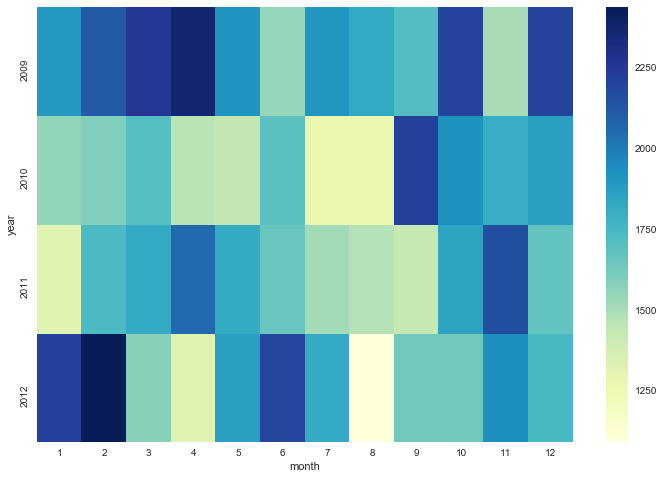

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(sales_pivot_year_month, cmap='YlGnBu')
plt.show()

In [54]:
from joblib import delayed, Parallel

ModuleNotFoundError: No module named 'joblib'